In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
np.random.seed(1234)

# Problem 3.5

_Consider the SCM $X=Y^2+N_X,Y=N_Y$ and $N_X,N_Y$ unit normal. Generate 200 iid samples._

Like all DAG SCMs, just generate in topological order of the graph.

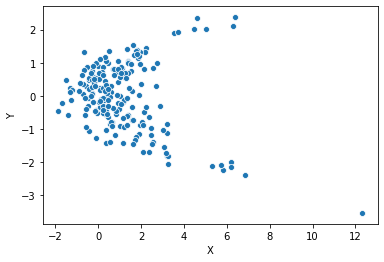

In [2]:
y = np.random.randn(200)
x = y ** 2 + np.random.randn(200)
sns.scatterplot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Problem 3.6

_For an SCM $C=N_C, E=4C+N_E$, standard independent normal noise, what is the distribution of $C|E=2$?_

Note that the joint is $(C, E)\sim N\left(\textbf{0},\begin{pmatrix}1&4\\4&17\end{pmatrix}\right)$, and since in general for join normal $(X, Y)\sim N\left(\begin{pmatrix}\boldsymbol{\mu}_X\\\boldsymbol{\mu}_Y\end{pmatrix},\begin{pmatrix}\Sigma_{XX}&\Sigma_{XY}\\\Sigma_{YX}&\Sigma_{YY}\end{pmatrix}\right)$, we have
$$
X|Y \sim N\left(\boldsymbol{\mu}_X+\Sigma_{XY}\Sigma_{YY}^{-1}(Y-\boldsymbol{\mu}_Y), \Sigma_{XX}-\Sigma_{XY}\Sigma_{YY}^{-1}\Sigma_{YX}\right)\,\,,
$$
with $\Sigma_{XY}=\Sigma_{YX}^\top$, in this particular case we end up with a distribution of $N(8/16,1/17)$.

# Problem 3.7

_Assume a process is either $X=Y+N_X,Y=N_Y$ or $Y=X+M_Y,X=M_X$ with all noises being independent normals with unknown means and variances each. Is there a single intervention distribution that lets you distinguish between the two models?_

No, for hard interventions.

Clearly any intervention distribution must only modify one variable. If it modifies both, then there is no SCM structure remaining, as the two-variable intervention then fully defines the SCM system.

Assume the intervention modifies $X$; $N_Y$ is a normal with unknown parameters, as is $X+M_Y$. Similarly for $Y$.

Yes, for soft interventions. E.g., set $X$ to any non-normal distribution, e.g., the Rademacher distribution. Then $N_Y$ is normal but $X+M_Y$ is not. A likelihood ratio test would distinguish between these two, for instance.

It'd be fun to come up with the "most anti-normal" distribution which allows distinguishing the two. Probably something weird. E.g., something which is orthogonal to the characteristic of a normal or something, or a distribution optimized to maximize the Shapiro-Wilk statistic.

# Problem 3.8

(Parts A and B combined)

_Show that cyclic SCMs may admit zero, one, or more solutions by analyzing the linear cyclic SCM $X=\epsilon Y+N_X,Y=\epsilon X+N_Y$, for some arbitrary distribution $(N_X,N_Y)\sim P$_.

Write $\textbf{x}=\begin{pmatrix}X\\Y\end{pmatrix}$ and $\boldsymbol\eta=\begin{pmatrix}N_X\\N_Y\end{pmatrix}$. The cyclic SCM must satisfy the almost sure equality
$$
B\textbf{x}=\boldsymbol\eta\,\,,
$$
where $B=\begin{pmatrix}1&-\epsilon\\-\epsilon&1\end{pmatrix}$, simply by rearranging the equations.

Assuming $A=B^{-1}=\frac{1}{1-\epsilon^2}\begin{pmatrix}1&\epsilon\\\epsilon&1\end{pmatrix}$ is well-defined, $\textbf{x}=A\boldsymbol\eta$ solves the SCM.

If $\boldsymbol\eta$ occupies a subspace of dimension 2 with nonzero probability, then $B$ must have columnspace of equivalent dimensionality for there to be any solution to $B\textbf{x}=\boldsymbol\eta$. But in such a case our solution $A\boldsymbol \eta$ is then unique. Namely, for values $\left|{\epsilon}\right|\neq 1$.

If $P$ factorizes and is Lebesgue measurable in each factor then that's a sufficient (but notably not necessary) condition for $\boldsymbol\eta$ to have a 2 dimensional image. This means that in this setting $\epsilon=1,-1$ SCMs have no solutions.

Finally, there are degenerate cases with infinitely many solutions. In particular, $B$ could have rank 1, say with $\epsilon=1$, and further we have a dependence $N_X=-N_Y$ respected by $P$ which allows any joint $(X,Y)$ to solve the SCM.